# Laboratorio 2
El presente documento tiene la finalidad de generar un manual práctico que permita comprender y ejecutar diversos comandos en Python en relación a ciertas inquietudes solicitadas.
El documento tiene 5 ejercicios prácticos de tratamiento de una base de datos como limpieza y creación de funciones.

## Ejercicio N°1
Generar una función y utilizar esta para recodificar la variable `país de origen` (1, 2, 3) en el dataframe a través de la función apply. Usar fichero **<p style="color: blue;">autos.csv</p>**

### Solución
Primero se comienza a subir la base de datos generando con ello un DataFrame:

In [469]:
# Importanto librerías
import pandas as pd 
import numpy as np

# Importando archivos
autos = open('C:/Users/osval/Documents/_INACAP/_Capacitaciones/Curso_R_inacap/_Ciencia de Datos/Python in Data Science/Tareas/Proyecto 2/autos.csv')
autos = pd.read_csv(autos, delimiter = ";")


#Visualizando la data
autos.head(3)


,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0


Primero se comenzará a hacer un análisis exploratorio de la columna `Pais_Origen` para der la cantidad de paises existentes. Para lo anterior se utilizará la función de agrupación para poder vizualizar los elementos contenidos.

In [470]:
grupo = autos.groupby('Pais_Origen').count()
grupo

,Millas_Por_Galon,Cilindros,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
Pais_Origen,,,,,,,,
Europe,70,73,73,73,73,73,73,71
Japan,79,79,79,79,79,79,79,79
USA,249,254,254,254,254,254,254,250


Como resultado de lo anterior, es posible distinguir 3 paises. Por ello es que la codificación quedará como:  
1. Europe  
2. Japan  
3. USA  

In [471]:
#Generando función para recodificar los campos
def Cambiar_Pais (x):
    '''
    Función que permite reemplazar los valores de la columna Pais_Origen por los 1 (Europe), 2 (Japan) o 3 (USA)
    Parámetros de entrada:
    DataFrame
    '''
    if x == "Europe":
        return 1
    elif x == "Japan":
        return 2
    elif x == "USA":
        return 3
    else:
        return 4
 

In [510]:
#Reescribiendo la columna 'Pais_Origen_Cod'
print(" Agrupando los paises nuevamente se tiene: ")
autos['Pais_Origen_Cod'] = autos['Pais_Origen'].apply(Cambiar_Pais)
autos.head(5)

 Agrupando los paises nuevamente se tiene: 


,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Pais_Origen_Cod,Log10
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,3,-1.231866
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,3,-1.367977
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,3,-1.247155
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,3,-1.278754
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0,3,-1.249558


In [506]:
grupo = autos.groupby('Pais_Origen_Cod').count()
grupo['Pais_Origen']

Pais_Origen_Cod
1     73
2     79
3    254
Name: Pais_Origen, dtype: int64

## Ejercicio N°2
Generar un Notebook Colab con código y resultados, que contiene información de autos de un periodo de tiempo. Resolver los
siguientes:
- Limpieza y tratamiento de las variables (Según corresponda)
- Generar 5 nuevas variables aplicando los siguientes criterios con las variables numéricas:
1. Log10(var1/var2)
2. Sqrt(var1)*exp(var2)/200
3. Si var 1 > var 2 → 5, caso contrario 3
4. 1/logn(var1/var2)*100
5. var2**2/var1

### Solución 
#### Limpieza de datos
Respecto a la limpieza de datos, se comenzará revisando qué tipos de datos tiene, luego ver cómo está compuesta la Base de Datos.


In [474]:
#Características de autos.csv
autos.dtypes


Millas_Por_Galon     float64
Cilindros              int64
Pais_Origen           object
Peso_En_Libras         int64
Desplazamiento       float64
Aceleracion          float64
Nombre                object
Anyo                  object
Caballo_De_Fuerza    float64
Pais_Origen_Cod        int64
dtype: object

In [475]:
#Datos null
print ("Revisando si la base de datos contiene datos perdidos.")
autos.isnull().sum()


Revisando si la base de datos contiene datos perdidos.


Millas_Por_Galon     8
Cilindros            0
Pais_Origen          0
Peso_En_Libras       0
Desplazamiento       0
Aceleracion          0
Nombre               0
Anyo                 0
Caballo_De_Fuerza    6
Pais_Origen_Cod      0
dtype: int64

In [476]:
print("La cantidad de datos perdidos es:")
autos.isnull().sum().sum()

La cantidad de datos perdidos es:


14

In [477]:
print("Lo que corresponde a un porcentaje de:")
print(round(autos.isnull().sum().sum()/autos.shape[0]*100,4), "%")


Lo que corresponde a un porcentaje de:
3.4483 %


In [478]:
print("Identificando los registros que contienen algún dato faltante:")
filas_con_faltantes = autos[autos.isnull().any(axis=1)]
print(filas_con_faltantes[['Millas_Por_Galon','Caballo_De_Fuerza']])


Identificando los registros que contienen algún dato faltante:
     Millas_Por_Galon  Caballo_De_Fuerza
10                NaN              115.0
11                NaN              165.0
12                NaN              153.0
13                NaN              175.0
14                NaN              175.0
17                NaN              140.0
38               25.0                NaN
39                NaN               48.0
133              21.0                NaN
337              40.9                NaN
343              23.6                NaN
361              34.5                NaN
367               NaN              110.0
382              23.0                NaN


Para poder realizar la imputación de los datos, se utilizarán diversas técnicas para dar un mejor abanico de posibilidades. 
##### Imputación por mediana
- Imputación por la mediana
- Imputación Múltiple (MICE)
- Imputación Basada en la vecindad (KNN)

In [479]:
#Imputación por la mediana
autos1 = autos.copy()
autos1.fillna(autos1.median(), inplace=True)
print("La cantidad de datos faltantes es:", autos1.isnull().sum().sum())

La cantidad de datos faltantes es: 0


##### Imputación Múltiple (Multiple Imputation)
Para un enfoque más robusto, puedes utilizar MICE (Multiple Imputation by Chained Equations), disponible en bibliotecas como statsmodels o fancyimpute:



In [480]:
autos2 = autos.copy()
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Crear un imputador iterativo (MICE)
imputer = IterativeImputer(max_iter=10, random_state=0)

# Seleccionar las columnas relevantes para la imputación
columnas_para_imputar = ['Millas_Por_Galon', 'Cilindros', 'Peso_En_Libras', 
                         'Desplazamiento', 'Aceleracion', 'Caballo_De_Fuerza', 
                         'Pais_Origen_Cod']

# Aplicar la imputación múltiple
df_imputado = pd.DataFrame(imputer.fit_transform(autos2[columnas_para_imputar]), columns=columnas_para_imputar)

# Restaurar las columnas originales no imputadas
autos2[columnas_para_imputar] = df_imputado

autos2.head(3)


,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Pais_Origen_Cod
0,18.0,8.0,USA,3504.0,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,3.0
1,15.0,8.0,USA,3693.0,350.0,11.5,buick skylark 320,1/01/1970,165.0,3.0
2,18.0,8.0,USA,3436.0,318.0,11.0,plymouth satellite,1/01/1970,150.0,3.0


In [481]:
print("La cantidad de datos perdidos es:")
autos2.isnull().sum().sum()

La cantidad de datos perdidos es:


0

##### Imputación Basada en Vecindad (K-Nearest Neighbors Imputation)
Utiliza algoritmos como el k-vecinos más cercanos (KNN), que llenan los valores faltantes basándose en la similitud de otras filas.
- Con scikit-learn:

In [482]:
from sklearn.impute import KNNImputer
import pandas as pd

autos3 = autos.copy()

imputer = KNNImputer(n_neighbors=7)  # Considera 7 vecinos
# Seleccionar las columnas relevantes para la imputación
columnas_para_imputar = ['Millas_Por_Galon', 'Cilindros', 'Peso_En_Libras', 
                         'Desplazamiento', 'Aceleracion', 'Caballo_De_Fuerza', 
                         'Pais_Origen_Cod']

df_imputado = pd.DataFrame(imputer.fit_transform(autos3[columnas_para_imputar]), columns=columnas_para_imputar)
# Restaurar las columnas originales no imputadas
autos3[columnas_para_imputar] = df_imputado

autos3.head(3)


,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Pais_Origen_Cod
0,18.0,8.0,USA,3504.0,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,3.0
1,15.0,8.0,USA,3693.0,350.0,11.5,buick skylark 320,1/01/1970,165.0,3.0
2,18.0,8.0,USA,3436.0,318.0,11.0,plymouth satellite,1/01/1970,150.0,3.0


In [483]:
print("La cantidad de datos perdidos es:")
autos3.isnull().sum().sum()

La cantidad de datos perdidos es:


0

#### Generar 5 nuevas variables aplicando los siguientes criterios con las variables numéricas:
Se utilizarán las 3 bases de datos imputadas y posteriormente se generará una sumatoria para los campos de `Millas_Por_Galón` para comparar los resultados.
Las variables a considerar serán `Desplazamiento`, `Millas_Por_Galón`
##### Operatoria matemática 1
$ {\log_{10}*(\frac{var1}{var2}}) $

In [484]:
var1 = "Millas_Por_Galon"
var2 = "Desplazamiento"

def cal_log(x: float, y: float, TypeCal: bool = False) -> float:
      
    log = np.log10(x/y)
    return log

#BBDD autos

autos['Log10'] = cal_log(x = autos[var1], 
                         y = autos[var2],
                         TypeCal = True)
print("Suma de auto[Log10]", round(autos['Log10'].sum(),4))

Suma de auto[Log10] -349.4647


In [485]:
#BBDD autos1

autos1['Log10'] = cal_log(x = autos1[var1], 
                         y = autos1[var2],
                         TypeCal = True)
print("Imputación por mediana")
print("Suma de auto1[Log10]", round(autos1['Log10'].sum(),4))

Imputación por mediana
Suma de auto1[Log10] -357.4732


In [486]:
#BBDD autos2

autos2['Log10'] = cal_log(x = autos2[var1], 
                         y = autos2[var2],
                         TypeCal = True)
print("Imputación por MUCI")
print("Suma de auto2[Log10]", round(autos2['Log10'].sum(),4))

Imputación por MUCI
Suma de auto2[Log10] -358.2038


In [487]:
#BBDD autos3

autos3['Log10'] = cal_log(x = autos3[var1], 
                         y = autos3[var2],
                         TypeCal = True)
print("Imputación por KNN")
print("Suma de auto3[Log10]", round(autos3['Log10'].sum(),4))

Imputación por KNN
Suma de auto3[Log10] -358.1207


In [511]:
resumen = pd.DataFrame({'BBDD' : ['auto','auto1','auto2','auto3'],
                       'log10' : [round(autos['Log10'].sum(),4), round(autos1['Log10'].sum(),4),
                       round(autos2['Log10'].sum(),4), round(autos3['Log10'].sum(),4)],
                       'Modelo' : ['Sin imputación', 'Mediana', 'MUCI', 'KNN']})

resumen

,BBDD,log10,Modelo
0,auto,-349.4647,Sin imputación
1,auto1,-357.4732,Mediana
2,auto2,-358.2038,MUCI
3,auto3,-358.1207,KNN


##### Operatoria matemática 2
$ \frac{\sqrt{var1}*e^{var2}}{200} $  

Para el siguiente ejercicio, se tomará como modelo de imputación el MICI, así que se utilizará la base de datos *auto2*

In [489]:
#Definiciendo la función
def raizcuad (x : float, y : float, TypeCal : bool = False) -> float:
    '''
    Función para la raíz cuadrada de una variable y multiplicarla por e elevado a la segunda variable y 
    dividirla por una constante (200)

    '''
    rc = np.sqrt(x) * np.exp(y) / 200
    return round(rc,4)


In [490]:
raizcuad(x = autos2[var1], 
         y = autos2[var2],
         TypeCal = True)

0      4.518686e+131
1      1.950223e+150
2      2.705525e+136
3      2.121058e+130
4      2.958884e+129
           ...      
401     1.643915e+59
402     4.438754e+40
403     1.205869e+57
404     3.450538e+50
405     1.335655e+50
Length: 406, dtype: float64

##### Operatoria matemática 3
Si var 1 > var 2 → 5, caso contrario 3

In [491]:
def comparacion (x : float,
                y : float,
                TypeCal: bool = False)-> int:
    condiciones = [x > y, x <= y]
    opciones = [5,3]
    resultado = np.select(condiciones, opciones)
    return resultado

In [492]:
autos2['Compara'] = comparacion(autos2[var1], autos2[var2], TypeCal = True)
autos2[['Millas_Por_Galon','Desplazamiento','Compara']]

,Millas_Por_Galon,Desplazamiento,Compara
0,18.0,307.0,3
1,15.0,350.0,3
2,18.0,318.0,3
3,16.0,304.0,3
4,17.0,302.0,3
...,...,...,...
401,27.0,140.0,3
402,44.0,97.0,3
403,32.0,135.0,3
404,28.0,120.0,3


##### Operatoria matemática 4
$\frac{1}{log(\frac{var_1}{var_2})}*100$

In [493]:
def divilog (x : float,
                y : float,
                TypeCal: bool = False)-> int:
         return  round(x/(np.log10(x/y))*100,4)
        

In [494]:
print("La operatoria matemática solicitada, para las dos variables, queda: ") 
divilog(autos2[var1], autos2[var2], TypeCal=True)

La operatoria matemática solicitada, para las dos variables, queda: 


0      -1461.1980
1      -1096.5098
2      -1443.2854
3      -1251.2184
4      -1360.4810
          ...    
401    -3777.4692
402   -12816.0669
403    -5118.4948
404    -4430.2170
405    -5306.5357
Length: 406, dtype: float64

##### Operatoria matemática 5
$\frac{(var2^2)}{var1}$

In [495]:
def div_variables (x : float,
                y : float,
                TypeCal: bool = False)-> float:
    return (y**2)/x

In [496]:
print ("La operatoria matemática entre las dos variables queda:")
div_variables(autos2[var1], autos2[var2], TypeCal = True)

La operatoria matemática entre las dos variables queda:


0      5236.055556
1      8166.666667
2      5618.000000
3      5776.000000
4      5364.941176
          ...     
401     725.925926
402     213.840909
403     569.531250
404     514.285714
405     456.806452
Length: 406, dtype: float64

## Ejercicio N°3
Crear una función que permita generar 3 variables cualitativas ordinales a partir de las variables numéricas con
los siguientes criterios:  

★ Si es mayor a la “media + 1*desviación estándar”
→ Alto  
★ Si está entre “media - 1*desviación estándar” y
“media + 1*desviación estándar” → Medio  
★ Si es menor a la “media - 1*desviación estándar”
→ Bajo  

Nota: Mostrar con las nuevas variables generadas.
Elegir con libertad las variables a trabajar.
La función debe contar con su respectiva documentación.

### Solución

In [497]:
"""
La función contampla 4 parámetros de ingresos
Vector a analizar
media del vector
Desviación estándar del vector
Boleando True

"""
def categoriza (x : float,
                md :float,
                sd :float,
                TypeCal : bool = False) -> float:
    
    condiciones=[
                x > (md + sd),
       ((x <= (md + sd)) & (x >= (md - sd))),
       x < (md - sd)
                ]
    
    objetivo= ["Alto", "Medio", "Bajo"]
    
    resultado = np.select(condiciones, objetivo)
     
    return resultado
    

In [498]:
print("Evaluando la función creada:")
Categorizacion = categoriza(x = autos2[var1],
                            md = autos2[var1].mean(),
                            sd = autos2[var1].std(),
                            TypeCal=True)
Categorizacion = pd.Series(Categorizacion)
Categorizacion


Evaluando la función creada:


0      Medio
1       Bajo
2      Medio
3      Medio
4      Medio
       ...  
401    Medio
402     Alto
403     Alto
404    Medio
405    Medio
Length: 406, dtype: object

## Ejercicio N°4
Crear una función que muestre los siguientes gráficos (simultáneamente) para las variables numéricas, según una variable cualitativa:  
- Cajas y bigotes  
- Barras de la media  
- Histograma con Curva  

La función debe contar con su respectiva documentación.
### Solución
El presente ejercicio será resuelto utilizando la librería `matplotib.pyplot` que permite generar una gráfica múltiple. En este caso, se realizarán 4 gráficas en el mismo elemento a fin de facilitar la lectura de los datos.

In [499]:
#Importando las librerías
def graficar(x:float, y:float):
    """
    Función que permite graficar una variable cualitativa en un panel de 2x2
    x: variable cualitativa
    y: variable cuantitativa
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    _, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6)) # 1 Fila [0]
    
    sns.boxplot(x,
                y,
                ax = axes[0,0],
               palette='pastel') #En Cuadrante 2
    
    sns.barplot(x, 
                y,
                estimator=np.mean,
               palette='pastel',
                ax=axes[0,1])#En Cuadrante 1
    
    sns.histplot (y,
                 ax=axes[1,0],
               palette='pastel',
                 kde=True) #Grafica una función de densidad #En Cuadrante 3
    
    sns.violinplot(x,    #Se aprovecha el cuardo cuadrante para incorporar un gráfico de violín y 
                         #así evitar que no quede un espacio vacío
                y,
                palette='pastel',
                ax=axes[1,1])#En Cuadrante 4)
    


C:\Users\osval\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\osval\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\osval\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


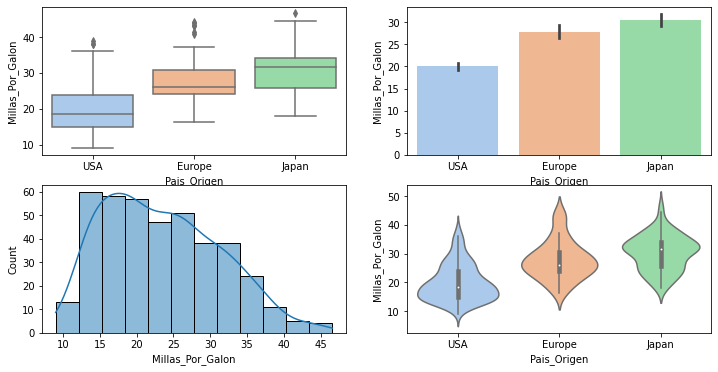

In [500]:
graficar(x = autos2['Pais_Origen'], y = autos2['Millas_Por_Galon'])

## Ejercicio N°5
Crear una función que devuelva un mapa de calor con la correlación de todas las variables numéricas (incluye las generadas), para cada país.
La función debe contar con su respectiva documentación.
### Solución
Usando la librería `seaborn`, se podrá realizar un mapa de calor de las correlaciones entre las variables

In [501]:
def mapa_calor (x):
    import seaborn as sns
    """
    
    """
    sns.heatmap(x,
    xticklabels = x.columns.values,
    yticklabels = x.columns.values,
    annot = True,
    cmap = "Blues" # viridis, Blues
    );

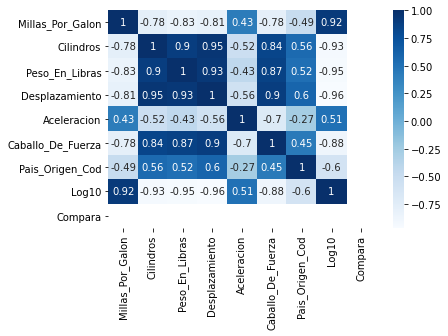

In [502]:
mapa_calor(autos2.corr())

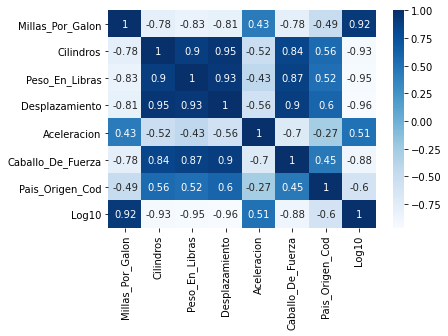

In [503]:
mapa_calor(autos3.corr())

Documento elaborado por Osvaldo Cubillos.